In [2]:
import numpy as np
import os
import cv2
from keras.layers import Input, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import time
import matplotlib.pyplot as plt
get_ipython().magic(u"matplotlib inline")
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers import LeakyReLU
from keras.layers import concatenate
from keras.layers import UpSampling2D, Reshape
from keras.utils import plot_model

In [3]:
np.random.seed(1)

train_images = []
test_images = []
train_labels = []
test_labels = []
validation_images = []
validation_labels = []

classes = ["KAKAPO", "AFRICAN OYSTER CATCHER", "BANANAQUIT", "CASSOWARY", "EMPEROR PENGUIN", "HYACINTH MACAW", "LILAC ROLLER", "PEACOCK", "ROSE BREASTED COCKATOO", "SNOWY OWL"]
encoded_labels_dictionary = {"KAKAPO": 0, "AFRICAN OYSTER CATCHER": 1, "BANANAQUIT": 2, "CASSOWARY": 3, "EMPEROR PENGUIN": 4, "HYACINTH MACAW": 5, "LILAC ROLLER": 6, "PEACOCK" : 7, "ROSE BREASTED COCKATOO": 8, "SNOWY OWL": 9}
decoded_labels_dictionary = {0: "KAKAPO", 1: "AFRICAN OYSTER CATCHER", 2: "BANANAQUIT", 3: "CASSOWARY", 4: "EMPEROR PENGUIN", 5: "HYACINTH MACAW", 6: "LILAC ROLLER", 7: "PEACOCK", 8: "ROSE BREASTED COCKATOO", 9: "SNOWY OWL"}
# make sure to upload zip folder to the content directory before running
!unzip "/content/BirdSpeciesClassificationFinalProject.zip"
image_path = "/content/BirdSpeciesClassification/train/"
test_image_path = "/content/BirdSpeciesClassification/test/"
validation_image_path = "/content/BirdSpeciesClassification/valid/"
image_size = 128

for label in classes:
  for image in os.listdir(image_path + label):
      image_array = cv2.imread(os.path.join(image_path + label, image), cv2.IMREAD_COLOR)
      image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
      resize_array = cv2.resize(image_array, (image_size, image_size))
      train_images.append([resize_array])
      train_labels.append(encoded_labels_dictionary[label])


train_images = np.array(train_images)
train_images = train_images.astype("float32") / 255.0
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))

for label in classes:
  for image in os.listdir(test_image_path + label):
      image_array = cv2.imread(os.path.join(test_image_path + label, image), cv2.IMREAD_COLOR)
      image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
      resize_array = cv2.resize(image_array, (image_size, image_size))
      test_images.append([resize_array])
      test_labels.append(encoded_labels_dictionary[label])


test_images = np.array(test_images)
test_images = test_images.astype("float32") / 255.0
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))


for label in classes:
  for image in os.listdir(validation_image_path + label):
      image_array = cv2.imread(os.path.join(validation_image_path + label, image), cv2.IMREAD_COLOR)
      image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
      resize_array = cv2.resize(image_array, (image_size, image_size))
      validation_images.append([resize_array])
      validation_labels.append(encoded_labels_dictionary[label])


validation_images = np.array(validation_images)
validation_images = validation_images.astype("float32") / 255.0
validation_images = validation_images.reshape((len(validation_images), np.prod(validation_images.shape[1:])))

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
validation_labels = np.array(validation_labels)

train_labels_ohe = to_categorical(train_labels, num_classes=10)
test_labels_ohe = to_categorical(test_labels, num_classes=10)
validation_labels_ohe = to_categorical(validation_labels, num_classes=10)

Archive:  /content/BirdSpeciesClassificationFinalProject.zip
   creating: BirdSpeciesClassification/test/
   creating: BirdSpeciesClassification/test/AFRICAN OYSTER CATCHER/
  inflating: BirdSpeciesClassification/test/AFRICAN OYSTER CATCHER/1.jpg  
  inflating: BirdSpeciesClassification/test/AFRICAN OYSTER CATCHER/2.jpg  
  inflating: BirdSpeciesClassification/test/AFRICAN OYSTER CATCHER/3.jpg  
  inflating: BirdSpeciesClassification/test/AFRICAN OYSTER CATCHER/4.jpg  
  inflating: BirdSpeciesClassification/test/AFRICAN OYSTER CATCHER/5.jpg  
   creating: BirdSpeciesClassification/test/BANANAQUIT/
  inflating: BirdSpeciesClassification/test/BANANAQUIT/1.jpg  
  inflating: BirdSpeciesClassification/test/BANANAQUIT/2.jpg  
  inflating: BirdSpeciesClassification/test/BANANAQUIT/3.jpg  
  inflating: BirdSpeciesClassification/test/BANANAQUIT/4.jpg  
  inflating: BirdSpeciesClassification/test/BANANAQUIT/5.jpg  
   creating: BirdSpeciesClassification/test/CASSOWARY/
  inflating: BirdSpeciesC

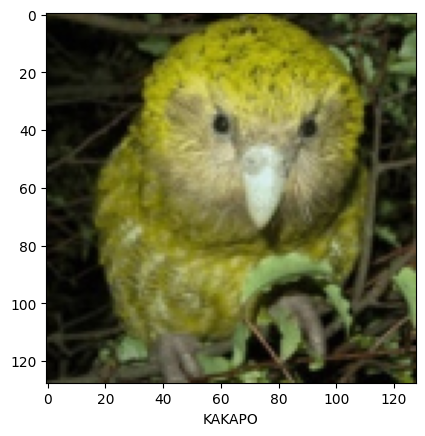

In [ ]:
plt.imshow(train_images[0].reshape(128,128,3))
plt.xlabel(decoded_labels_dictionary[train_labels[0]])
plt.show()

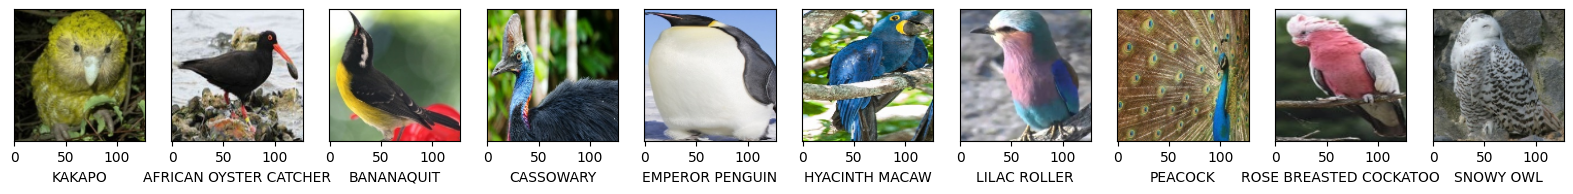

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
idx = 0
step = len(train_images) // 10
for i in range(n):
    if i == (n-1): # step results in 2 cockatoo pictures so manually set last to snowy owl to snow all classes
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(train_images[-1].reshape(image_size, image_size,3))
      ax.set_xlabel(decoded_labels_dictionary[train_labels[-1]])
      ax.get_yaxis().set_visible(False)
      idx += step
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[idx].reshape(image_size, image_size,3))
    ax.set_xlabel(decoded_labels_dictionary[train_labels[idx]])
    ax.get_yaxis().set_visible(False)
    idx += step



In [4]:
train_images_cnn_input = train_images.reshape(train_images.shape[0], 128, 128, 3)
test_images_cnn_input = test_images.reshape(test_images.shape[0], 128, 128, 3)
validation_images_cnn_input = test_images.reshape(validation_images.shape[0], 128, 128, 3)

idx_shuffle = np.random.permutation(len(train_images_cnn_input))
train_images_cnn_input_shuffled = train_images_cnn_input[idx_shuffle]
train_labels_ohe_shuffled = train_labels_ohe[idx_shuffle]

idx_shuffle = np.random.permutation(len(test_images_cnn_input))
test_images_cnn_input_shuffled = test_images_cnn_input[idx_shuffle]
test_labels_ohe_shuffled = test_labels_ohe[idx_shuffle]

idx_shuffle = np.random.permutation(len(validation_images_cnn_input))
validation_images_cnn_input_shuffled = validation_images_cnn_input[idx_shuffle]
validation_labels_ohe_shuffled = validation_labels_ohe[idx_shuffle]

In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))



model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])


start = time.time()
model.fit(train_images_cnn_input, train_labels_ohe, epochs = 10, batch_size = 32, validation_data=(validation_images_cnn_input, validation_labels_ohe))
end = time.time()
total_time = end-start

score = model.evaluate(test_images_cnn_input, test_labels_ohe)
print("Test accuracy: ", score[1])
print(f"Train Time(h): {total_time/(60*60)}")
print(f"Train Time(m): {total_time/60}")
print(f"Train Time(s): {total_time}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.2951 - loss: 2.0121 - val_accuracy: 0.8400 - val_loss: 0.6814
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7643 - loss: 0.7712 - val_accuracy: 0.8800 - val_loss: 0.3823
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8767 - loss: 0.3954 - val_accuracy: 0.8800 - val_loss: 0.3920
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8943 - loss: 0.3120 - val_accuracy: 0.9200 - val_loss: 0.2834
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9394 - loss: 0.1836 - val_accuracy: 0.9400 - val_loss: 0.2571
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 80s 994ms/step - accuracy: 0.9752 - loss: 0.1077 - val_accuracy: 0.8600 - val_loss: 0.2800
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9666 - loss: 0.1006 - val_accuracy: 0.9600 - val_loss: 0.0945
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9717 - loss: 0.0894 - val_accuracy: 1.0000 - val_lo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,917,792 (37.83 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,611,862 (25.22 MB)

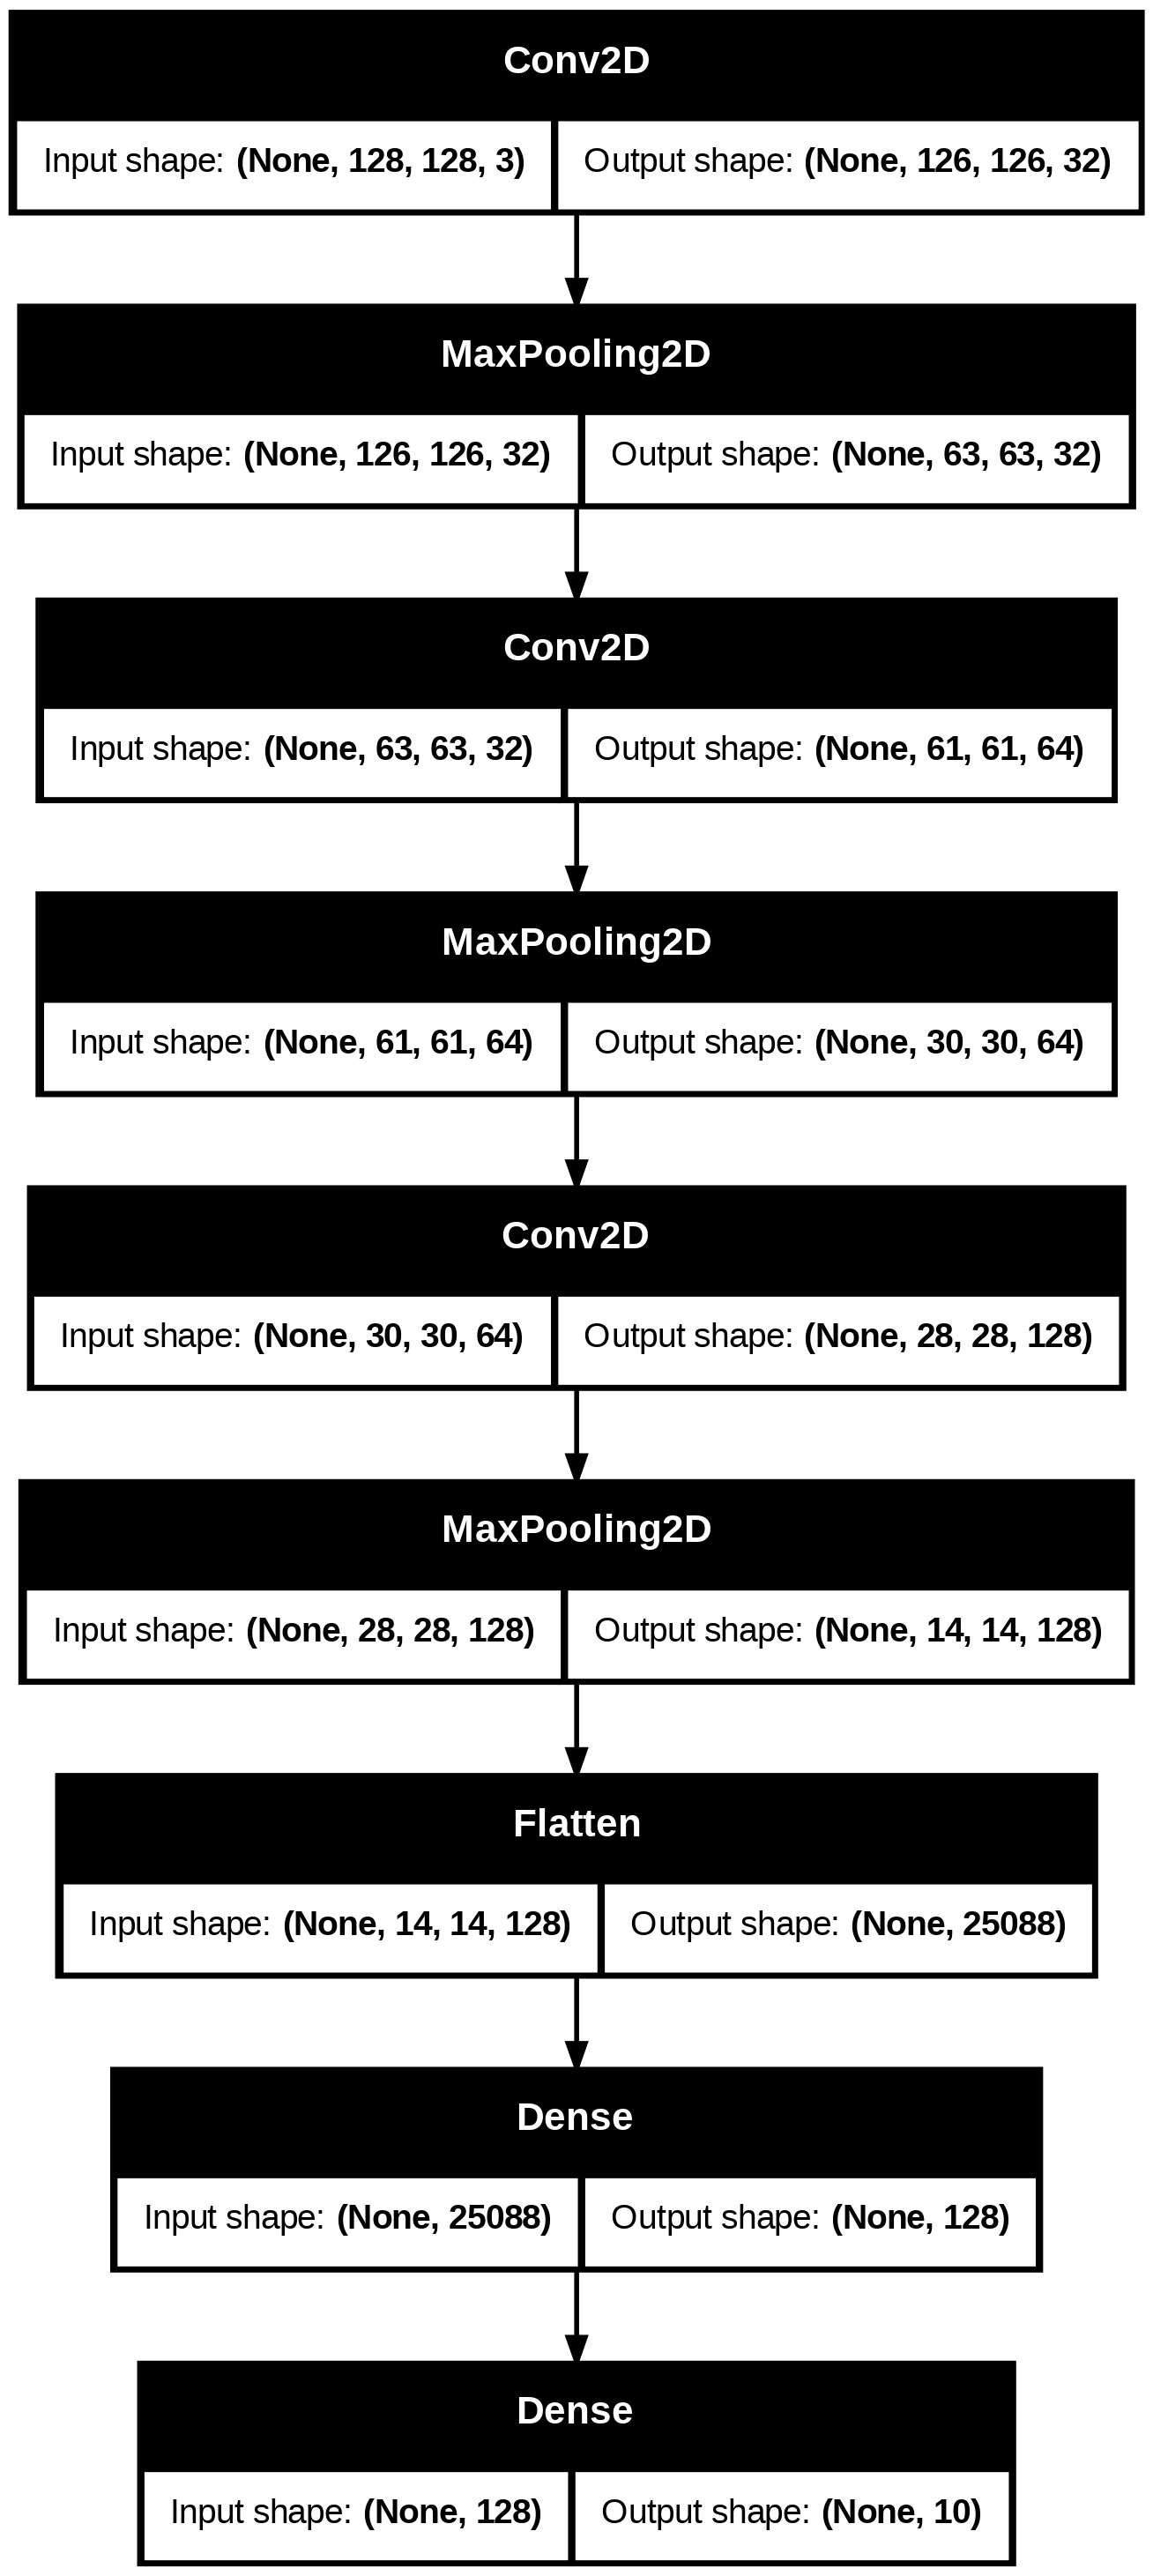

In [ ]:
model.summary()
plot_model(model, to_file="model_plot1.png", show_shapes=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step


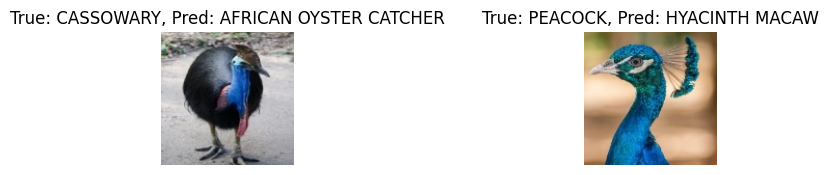

In [ ]:
y_pred = model.predict(test_images_cnn_input)
y_pred_labels = np.argmax(y_pred, axis = 1)

incorrect_idx = np.where(y_pred_labels != np.argmax(test_labels_ohe, axis=1))[0]

if len(incorrect_idx) < n:
    sample_incorrect = incorrect_idx
else:
    sample_incorrect = np.random.choice(incorrect_idx, size=n, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_incorrect):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images_cnn_input[idx])
    plt.title(f"True: {decoded_labels_dictionary[np.argmax(test_labels_ohe[idx])]}, Pred: {decoded_labels_dictionary[y_pred_labels[idx]]}")
    plt.axis("off")
plt.show()

In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))



model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])


start = time.time()
model.fit(train_images_cnn_input_shuffled, train_labels_ohe_shuffled, epochs = 10, batch_size = 32, validation_data=(validation_images_cnn_input_shuffled, validation_labels_ohe_shuffled))
end = time.time()
total_time = end-start

score = model.evaluate(test_images_cnn_input_shuffled, test_labels_ohe_shuffled)
print("Test accuracy: ", score[1])
print(f"Train Time(h): {total_time/(60*60)}")
print(f"Train Time(m): {total_time/60}")
print(f"Train Time(s): {total_time}")

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.3649 - loss: 1.8057 - val_accuracy: 0.7400 - val_loss: 0.8519
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 993ms/step - accuracy: 0.7642 - loss: 0.7585 - val_accuracy: 0.8200 - val_loss: 0.6032
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8601 - loss: 0.4825 - val_accuracy: 0.9600 - val_loss: 0.1714
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9222 - loss: 0.2417 - val_accuracy: 0.9400 - val_loss: 0.1322
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9590 - loss: 0.1222 - val_accuracy: 0.9000 - val_loss: 0.2226
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9697 - loss: 0.0956 - val_accuracy: 0.9400 - val_loss: 0.1840
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9816 - loss: 0.0645 - val_accuracy: 0.9000 - val_loss: 0.2416
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9601 - loss: 0.1286 - val_accuracy: 0.8800 - val_lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step


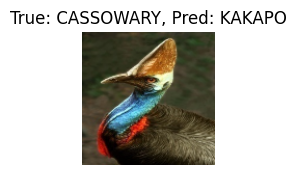

In [ ]:
y_pred = model.predict(test_images_cnn_input)
y_pred_labels = np.argmax(y_pred, axis = 1)

incorrect_idx = np.where(y_pred_labels != np.argmax(test_labels_ohe, axis=1))[0]

if len(incorrect_idx) < n:
    sample_incorrect = incorrect_idx
else:
    sample_incorrect = np.random.choice(incorrect_idx, size=n, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_incorrect):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images_cnn_input[idx])
    plt.title(f"True: {decoded_labels_dictionary[np.argmax(test_labels_ohe[idx])]}, Pred: {decoded_labels_dictionary[y_pred_labels[idx]]}")
    plt.axis("off")
plt.show()

In [ ]:
input_layer = Input(shape=(128, 128, 3))

x = Conv2D(64, (7, 7), padding="same", strides=2, activation="relu")(input_layer)

x1 = Conv2D(32, (1, 1), padding="same", activation="relu")(x)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)

x2 = Conv2D(32, (1, 1), padding="same", activation="relu")(x)
x2 = Conv2D(32, (5, 5), padding="same", activation="relu")(x2)

x = concatenate([x, x1, x2], axis=-1)

x1 = Conv2D(64, (1, 1), padding="same", activation="relu")(x)
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)

x2 = Conv2D(64, (1, 1), padding="same", activation="relu")(x)
x2 = Conv2D(64, (5, 5), padding="same", activation="relu")(x2)

x = concatenate([x, x1, x2], axis=-1)

x = Flatten()(x)

x = Dense(256, activation = "selu")(x)

output_layer = Dense(10, activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()
plot_model(model, to_file="model_plot3.png", show_shapes=True)


model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])


start = time.time()
model.fit(train_images_cnn_input, train_labels_ohe, epochs = 10, batch_size = 32, validation_data=(validation_images_cnn_input, validation_labels_ohe))
end = time.time()
total_time = end-start

score = model.evaluate(test_images_cnn_input, test_labels_ohe)
print("Test accuracy: ", score[1])
print(f"Train Time(h): {total_time/(60*60)}")
print(f"Train Time(m): {total_time/60}")
print(f"Train Time(s): {total_time}")

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 64, 64, 64)     │          9,472 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 64, 64, 32)     │          2,080 │ conv2d_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 64, 64, 32)     │          2,080 │ conv2d_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 64, 64, 32)     │          9,248 │ conv2d_28[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 64, 64, 32)     │         25,632 │ conv2d_30[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 64, 64, 128)    │              0 │ conv2d_27[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_29[0][0],       │
│                           │                        │                │ conv2d_31[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 64, 64, 64)     │          8,256 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_34 (Conv2D)        │ (None, 64, 64, 64)     │          8,256 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_33 (Conv2D)        │ (None, 64, 64, 64)     │         36,928 │ conv2d_32[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_35 (Conv2D)        │ (None, 64, 64, 64)     │        102,464 │ conv2d_34[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 64, 64, 256)    │              0 │ concatenate_3[0][0],   │
│ (Concatenate)             │                        │                │ conv2d_33[0][0],       │
│                           │                        │                │ conv2d_35[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 1048576)        │              0 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 256)            │    268,435,712 │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 10)             │          2,570 │ dense_9[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 268,642,698 (1.00 GB)

 Trainable params: 268,642,698 (1.00 GB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 529s 10s/step - accuracy: 0.2205 - loss: 14.1825 - val_accuracy: 0.7400 - val_loss: 0.9738
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 561s 10s/step - accuracy: 0.8124 - loss: 0.6266 - val_accuracy: 0.8000 - val_loss: 0.5874
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 563s 10s/step - accuracy: 0.9457 - loss: 0.2231 - val_accuracy: 0.8600 - val_loss: 0.4766
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 556s 10s/step - accuracy: 0.9938 - loss: 0.0388 - val_accuracy: 0.9000 - val_loss: 0.4079
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 569s 10s/step - accuracy: 0.9994 - loss: 0.0095 - val_accuracy: 0.9000 - val_loss: 0.3652
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 553s 10s/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.8800 - val_loss: 0.3658
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 520s 10s/step - accuracy: 1.0000 - loss: 8.1232e-04 - val_accuracy: 0.8800 - val_loss: 0.4268
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 566s 10s/step - accuracy: 1.0000 - loss: 9.2182e-04 - val_acc

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 986ms/step


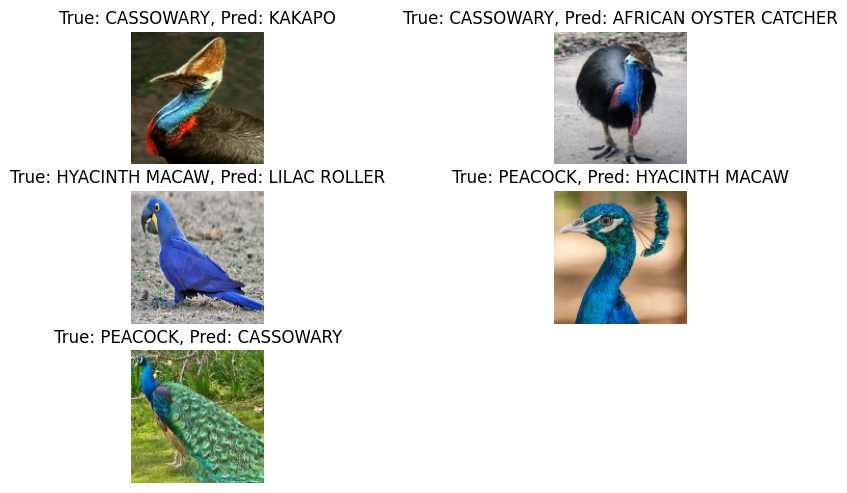

In [ ]:
y_pred = model.predict(test_images_cnn_input)
y_pred_labels = np.argmax(y_pred, axis = 1)

incorrect_idx = np.where(y_pred_labels != np.argmax(test_labels_ohe, axis=1))[0]

if len(incorrect_idx) < n:
    sample_incorrect = incorrect_idx
else:
    sample_incorrect = np.random.choice(incorrect_idx, size=n, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_incorrect):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images_cnn_input[idx])
    plt.title(f"True: {decoded_labels_dictionary[np.argmax(test_labels_ohe[idx])]}, Pred: {decoded_labels_dictionary[y_pred_labels[idx]]}")
    plt.axis("off")
plt.show()

In [ ]:
input_layer = Input(shape=(128, 128, 3))

x = Conv2D(64, (7, 7), padding="same", strides=2, activation="relu")(input_layer)

x1 = Conv2D(32, (1, 1), padding="same", activation="relu")(x)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)

x2 = Conv2D(32, (1, 1), padding="same", activation="relu")(x)
x2 = Conv2D(32, (5, 5), padding="same", activation="relu")(x2)

x = concatenate([x, x1, x2], axis=-1)


x1 = Conv2D(64, (1, 1), padding="same", activation="relu")(x)
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)

x2 = Conv2D(64, (1, 1), padding="same", activation="relu")(x)
x2 = Conv2D(64, (5, 5), padding="same", activation="relu")(x2)

x = concatenate([x, x1, x2], axis=-1)

x = GlobalAveragePooling2D()(x)

output_layer = Dense(10, activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()
plot_model(model, to_file="model_plot4.png", show_shapes=True)


model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])


start = time.time()
model.fit(train_images_cnn_input, train_labels_ohe, epochs = 10, batch_size = 32, validation_data=(validation_images_cnn_input, validation_labels_ohe))
end = time.time()
total_time = end-start

score = model.evaluate(test_images_cnn_input, test_labels_ohe)
print("Test accuracy: ", score[1])
print(f"Train Time(h): {total_time/(60*60)}")
print(f"Train Time(m): {total_time/60}")
print(f"Train Time(s): {total_time}")

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_54 (Conv2D)        │ (None, 64, 64, 64)     │          9,472 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 64, 64, 32)     │          2,080 │ conv2d_54[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 64, 64, 32)     │          2,080 │ conv2d_54[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 64, 64, 32)     │          9,248 │ conv2d_55[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 64, 64, 32)     │         25,632 │ conv2d_57[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_9             │ (None, 64, 64, 128)    │              0 │ conv2d_54[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_56[0][0],       │
│                           │                        │                │ conv2d_58[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 64, 64, 64)     │          8,256 │ concatenate_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 64, 64, 64)     │          8,256 │ concatenate_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 64, 64, 64)     │         36,928 │ conv2d_59[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_62 (Conv2D)        │ (None, 64, 64, 64)     │        102,464 │ conv2d_61[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_10            │ (None, 64, 64, 256)    │              0 │ concatenate_9[0][0],   │
│ (Concatenate)             │                        │                │ conv2d_60[0][0],       │
│                           │                        │                │ conv2d_62[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 256)            │              0 │ concatenate_10[0][0]   │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 10)             │          2,570 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 206,986 (808.54 KB)

 Trainable params: 206,986 (808.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 257s 5s/step - accuracy: 0.1857 - loss: 2.2164 - val_accuracy: 0.2600 - val_loss: 1.7577
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.3071 - loss: 1.8401 - val_accuracy: 0.5400 - val_loss: 1.4334
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - accuracy: 0.4264 - loss: 1.6082 - val_accuracy: 0.4000 - val_loss: 1.5946
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 258s 5s/step - accuracy: 0.4718 - loss: 1.4834 - val_accuracy: 0.5000 - val_loss: 1.3894
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.4798 - loss: 1.4662 - val_accuracy: 0.5400 - val_loss: 1.0804
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 260s 5s/step - accuracy: 0.5635 - loss: 1.2830 - val_accuracy: 0.5600 - val_loss: 1.1931
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.5831 - loss: 1.3017 - val_accuracy: 0.6600 - val_loss: 0.8963
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 260s 5s/step - accuracy: 0.5859 - loss: 1.1979 - val_accuracy: 0.6000 - v

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


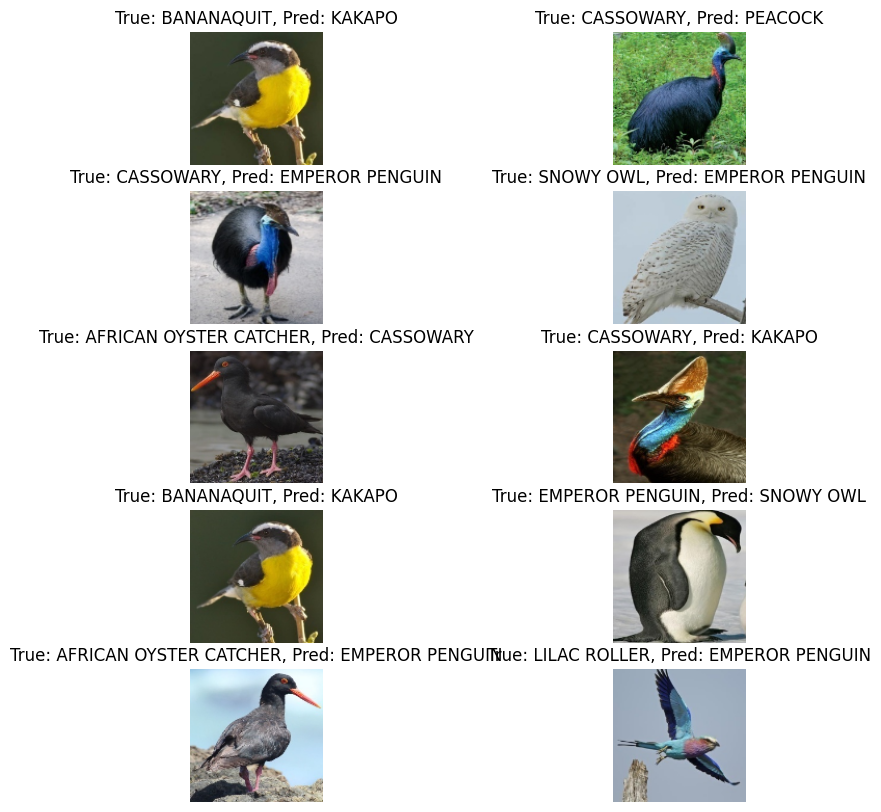

In [ ]:
y_pred = model.predict(test_images_cnn_input)
y_pred_labels = np.argmax(y_pred, axis = 1)

incorrect_idx = np.where(y_pred_labels != np.argmax(test_labels_ohe, axis=1))[0]

if len(incorrect_idx) < n:
    sample_incorrect = incorrect_idx
else:
    sample_incorrect = np.random.choice(incorrect_idx, size=n, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_incorrect):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images_cnn_input[idx])
    plt.title(f"True: {decoded_labels_dictionary[np.argmax(test_labels_ohe[idx])]}, Pred: {decoded_labels_dictionary[y_pred_labels[idx]]}")
    plt.axis("off")
plt.show()

In [ ]:
input_layer = Input(shape=(128, 128, 3))

x = Conv2D(64, (7, 7), padding="same", strides=2, activation="relu")(input_layer)

x1 = Conv2D(32, (1, 1), padding="same", activation="relu")(x)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)

x2 = Conv2D(32, (1, 1), padding="same", activation="relu")(x)
x2 = Conv2D(32, (5, 5), padding="same", activation="relu")(x2)

x3 = MaxPooling2D((1, 1), padding="same")(x)
x3 = Conv2D(32, (1, 1), padding="same", activation="relu")(x3)


x = concatenate([x, x1, x2, x3], axis=-1)

x1 = Conv2D(64, (1, 1), padding="same", activation="relu")(x)
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)

x2 = Conv2D(64, (1, 1), padding="same", activation="relu")(x)
x2 = Conv2D(64, (5, 5), padding="same", activation="relu")(x2)

x3 = MaxPooling2D((1, 1), padding="same")(x)
x3 = Conv2D(32, (1, 1), padding="same", activation="relu")(x3)


x = concatenate([x, x1, x2, x3], axis=-1)

x = Flatten()(x)

x = Dense(256, activation = "selu")(x)

output_layer = Dense(10, activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()
plot_model(model, to_file="model_plot5.png", show_shapes=True)


model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

start = time.time()
model.fit(train_images_cnn_input, train_labels_ohe, epochs = 10, batch_size = 32, validation_data=(validation_images_cnn_input, validation_labels_ohe))
end = time.time()
total_time = end-start

score = model.evaluate(test_images_cnn_input, test_labels_ohe)
print("Test accuracy: ", score[1])
print(f"Train Time(h): {total_time/(60*60)}")
print(f"Train Time(m): {total_time/60}")
print(f"Train Time(s): {total_time}")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 64, 64, 64)     │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 32)     │          2,080 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 32)     │          2,080 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 32)     │          9,248 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 32)     │         25,632 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 32)     │          2,080 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 160)    │              0 │ conv2d[0][0],          │
│                           │                        │                │ conv2d_2[0][0],        │
│                           │                        │                │ conv2d_4[0][0],        │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 64, 64, 64)     │         10,304 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 64, 64, 64)     │         10,304 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 160)    │              0 │ concatenate[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 64, 64, 64)     │        102,464 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 64, 64, 32)     │          5,152 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 64, 64, 320)    │              0 │ concatenate[0][0],     │
│ (Concatenate)             │                        │                │ conv2d_7[0][0],        │
│                           │                        │                │ conv2d_9[0][0],        │
│                      

 Total params: 335,762,890 (1.25 GB)

 Trainable params: 335,762,890 (1.25 GB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 654s 13s/step - accuracy: 0.2137 - loss: 25.4478 - val_accuracy: 0.5600 - val_loss: 1.1619
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 679s 13s/step - accuracy: 0.6501 - loss: 1.0020 - val_accuracy: 0.6800 - val_loss: 0.7378
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 685s 13s/step - accuracy: 0.7813 - loss: 0.6538 - val_accuracy: 0.8200 - val_loss: 0.5230
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 643s 13s/step - accuracy: 0.8901 - loss: 0.3086 - val_accuracy: 0.8200 - val_loss: 0.5837
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 678s 13s/step - accuracy: 0.9404 - loss: 0.1846 - val_accuracy: 0.8400 - val_loss: 0.4669
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 683s 13s/step - accuracy: 0.9579 - loss: 0.1790 - val_accuracy: 0.7800 - val_loss: 1.0403
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 633s 12s/step - accuracy: 0.9849 - loss: 0.0593 - val_accuracy: 0.8800 - val_loss: 0.3952
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 634s 12s/step - accuracy: 0.9955 - loss: 0.0161 - val_accuracy: 0

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


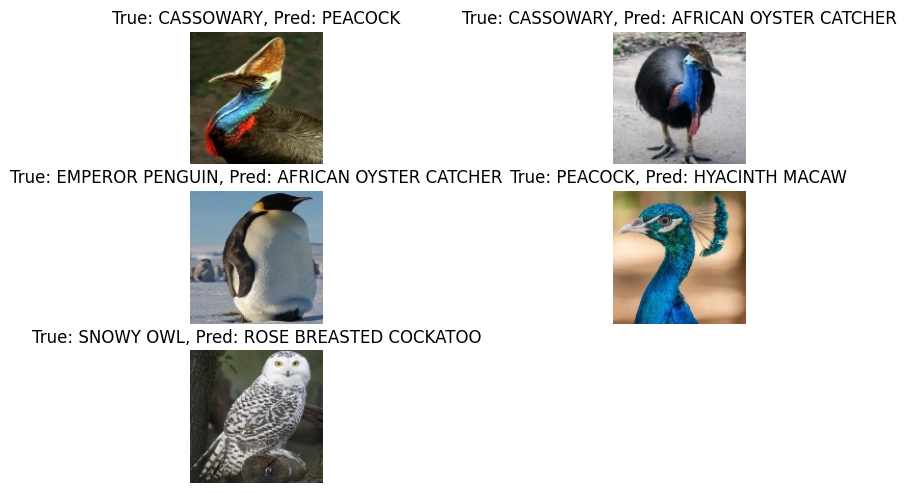

In [ ]:
y_pred = model.predict(test_images_cnn_input)
y_pred_labels = np.argmax(y_pred, axis = 1)

incorrect_idx = np.where(y_pred_labels != np.argmax(test_labels_ohe, axis=1))[0]

if len(incorrect_idx) < n:
    sample_incorrect = incorrect_idx
else:
    sample_incorrect = np.random.choice(incorrect_idx, size=n, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_incorrect):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images_cnn_input[idx])
    plt.title(f"True: {decoded_labels_dictionary[np.argmax(test_labels_ohe[idx])]}, Pred: {decoded_labels_dictionary[y_pred_labels[idx]]}")
    plt.axis("off")
plt.show()

In [5]:
input_layer = Input(shape=(128, 128, 3))

x = Conv2D(64, (7, 7), padding="same", strides=2, activation="relu")(input_layer)

x1 = Conv2D(32, (1, 1), padding="same", activation="relu")(x)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)

x2 = Conv2D(32, (1, 1), padding="same", activation="relu")(x)
x2 = Conv2D(32, (5, 5), padding="same", activation="relu")(x2)

x3 = MaxPooling2D((1, 1), padding="same")(x)
x3 = Conv2D(32, (1, 1), padding="same", activation="relu")(x3)


x = concatenate([x, x1, x2, x3], axis=-1)

x1 = Conv2D(64, (1, 1), padding="same", activation="relu")(x)
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)

x2 = Conv2D(64, (1, 1), padding="same", activation="relu")(x)
x2 = Conv2D(64, (5, 5), padding="same", activation="relu")(x2)

x3 = MaxPooling2D((1, 1), padding="same")(x)
x3 = Conv2D(32, (1, 1), padding="same", activation="relu")(x3)


x = concatenate([x, x1, x2, x3], axis=-1)

x = Flatten()(x)

x = Dense(256, activation = "selu")(x)

output_layer = Dense(10, activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()
plot_model(model, to_file="model_plot6.png", show_shapes=True)


model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])


gen = ImageDataGenerator(rotation_range=90, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.2, zoom_range=0.2)

test_gen = ImageDataGenerator()

train_generator = gen.flow(train_images_cnn_input, train_labels_ohe, batch_size=64)
test_generator = test_gen.flow(test_images_cnn_input, test_labels_ohe, batch_size=64)

start = time.time()
model.fit(train_generator, steps_per_epoch=train_images_cnn_input.shape[0]//256, epochs=10, validation_data=test_generator, validation_steps=test_images_cnn_input.shape[0]//64)


#model.fit(train_images_cnn_input, train_labels_ohe, epochs = 10, batch_size = 32, validation_data=(validation_images_cnn_input, validation_labels_ohe))
end = time.time()
total_time = end-start

score = model.evaluate(test_images_cnn_input, test_labels_ohe)
print("Test accuracy: ", score[1])
print(f"Train Time(h): {total_time/(60*60)}")
print(f"Train Time(m): {total_time/60}")
print(f"Train Time(s): {total_time}")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 64, 64, 64)     │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 32)     │          2,080 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 32)     │          2,080 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 32)     │          9,248 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 32)     │         25,632 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 32)     │          2,080 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 160)    │              0 │ conv2d[0][0],          │
│                           │                        │                │ conv2d_2[0][0],        │
│                           │                        │                │ conv2d_4[0][0],        │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 64, 64, 64)     │         10,304 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 64, 64, 64)     │         10,304 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 160)    │              0 │ concatenate[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 64, 64, 64)     │        102,464 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 64, 64, 32)     │          5,152 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 64, 64, 320)    │              0 │ concatenate[0][0],     │
│ (Concatenate)             │                        │                │ conv2d_7[0][0],        │
│                           │                        │                │ conv2d_9[0][0],        │
│                      

 Total params: 335,762,890 (1.25 GB)

 Trainable params: 335,762,890 (1.25 GB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 123s 19s/step - accuracy: 0.1136 - loss: 96.0022 - val_accuracy: 0.1600 - val_loss: 6.4427
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 124s 21s/step - accuracy: 0.1863 - loss: 4.3045 - val_accuracy: 0.2600 - val_loss: 2.1836
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 129s 21s/step - accuracy: 0.2412 - loss: 2.1199 - val_accuracy: 0.4000 - val_loss: 1.6525
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 134s 23s/step - accuracy: 0.3652 - loss: 1.6811 - val_accuracy: 0.5600 - val_loss: 1.3023
Epoch 5/10
2/6 ━━━━━━━━━━━━━━━━━━━━ 1:25 21s/step - accuracy: 0.4570 - loss: 1.4513

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.4492 - loss: 1.4579 - val_accuracy: 0.5200 - val_loss: 1.2837
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 129s 21s/step - accuracy: 0.4876 - loss: 1.3911 - val_accuracy: 0.5600 - val_loss: 1.1432
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 112s 19s/step - accuracy: 0.4920 - loss: 1.4134 - val_accuracy: 0.6000 - val_loss: 1.0692
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 125s 21s/step - accuracy: 0.4641 - loss: 1.3377 - val_accuracy: 0.5000 - val_loss: 1.1882
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 132s 23s/step - accuracy: 0.4896 - loss: 1.4016 - val_accuracy: 0.6600 - val_loss: 0.8478
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.6628 - loss: 1.1353 - val_accuracy: 0.6800 - val_loss: 0.8524
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6929 - loss: 0.8208
Test accuracy:  0.6800000071525574
Train Time(h): 0.31100158128473493
Train Time(m): 18.660094877084095
Train Time(s): 1119.6056926250458


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


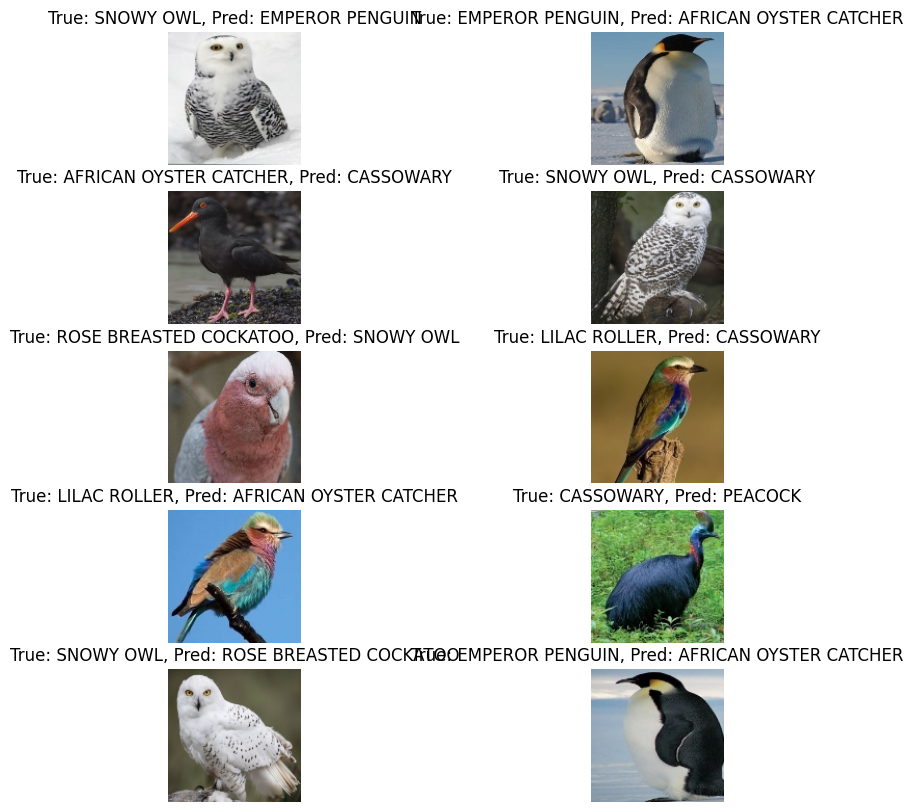

In [8]:
y_pred = model.predict(test_images_cnn_input)
y_pred_labels = np.argmax(y_pred, axis = 1)

incorrect_idx = np.where(y_pred_labels != np.argmax(test_labels_ohe, axis=1))[0]

if len(incorrect_idx) < n:
    sample_incorrect = incorrect_idx
else:
    sample_incorrect = np.random.choice(incorrect_idx, size=n, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_incorrect):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images_cnn_input[idx])
    plt.title(f"True: {decoded_labels_dictionary[np.argmax(test_labels_ohe[idx])]}, Pred: {decoded_labels_dictionary[y_pred_labels[idx]]}")
    plt.axis("off")
plt.show()

In [5]:
input_layer = Input(shape=(128, 128, 3))

x = Conv2D(64, (7, 7), padding="same", strides=2, activation="selu")(input_layer)

x1 = Conv2D(32, (1, 1), padding="same", activation="selu")(x)
x1 = Conv2D(32, (3, 3), padding="same", activation="selu")(x1)

x2 = Conv2D(32, (1, 1), padding="same", activation="selu")(x)
x2 = Conv2D(32, (5, 5), padding="same", activation="selu")(x2)

x3 = MaxPooling2D((1, 1), padding="same")(x)
x3 = Conv2D(32, (1, 1), padding="same", activation="selu")(x3)


x = concatenate([x, x1, x2, x3], axis=-1)

x1 = Conv2D(64, (1, 1), padding="same", activation="selu")(x)
x1 = Conv2D(64, (3, 3), padding="same", activation="selu")(x1)

x2 = Conv2D(64, (1, 1), padding="same", activation="selu")(x)
x2 = Conv2D(64, (5, 5), padding="same", activation="selu")(x2)

x3 = MaxPooling2D((1, 1), padding="same")(x)
x3 = Conv2D(32, (1, 1), padding="same", activation="selu")(x3)


x = concatenate([x, x1, x2, x3], axis=-1)

x = Flatten()(x)

x = Dense(256, activation = "selu")(x)

output_layer = Dense(10, activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()
plot_model(model, to_file="model_plot7.png", show_shapes=True)


model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])


start = time.time()
model.fit(train_images_cnn_input, train_labels_ohe, epochs = 10, batch_size = 32, validation_data=(validation_images_cnn_input, validation_labels_ohe))
end = time.time()
total_time = end-start

score = model.evaluate(test_images_cnn_input, test_labels_ohe)
print("Test accuracy: ", score[1])
print(f"Train Time(h): {total_time/(60*60)}")
print(f"Train Time(m): {total_time/60}")
print(f"Train Time(s): {total_time}")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 64, 64, 64)     │          9,472 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 32)     │          2,080 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 32)     │          2,080 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 32)     │          9,248 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 32)     │         25,632 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 32)     │          2,080 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 160)    │              0 │ conv2d[0][0],          │
│                           │                        │                │ conv2d_2[0][0],        │
│                           │                        │                │ conv2d_4[0][0],        │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 64, 64, 64)     │         10,304 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 64, 64, 64)     │         10,304 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 160)    │              0 │ concatenate[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 64, 64, 64)     │        102,464 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 64, 64, 32)     │          5,152 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 64, 64, 320)    │              0 │ concatenate[0][0],     │
│ (Concatenate)             │                        │                │ conv2d_7[0][0],        │
│                           │                        │                │ conv2d_9[0][0],        │
│                      

 Total params: 335,762,890 (1.25 GB)

 Trainable params: 335,762,890 (1.25 GB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 599s 12s/step - accuracy: 0.1337 - loss: 313.7111 - val_accuracy: 0.1000 - val_loss: 3.8152
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 593s 12s/step - accuracy: 0.1149 - loss: 3.3997 - val_accuracy: 0.1000 - val_loss: 2.7950
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 622s 12s/step - accuracy: 0.1057 - loss: 2.5866 - val_accuracy: 0.1000 - val_loss: 2.3191
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 617s 12s/step - accuracy: 0.1385 - loss: 2.3048 - val_accuracy: 0.1000 - val_loss: 2.3055
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 628s 12s/step - accuracy: 0.1033 - loss: 2.3042 - val_accuracy: 0.1000 - val_loss: 2.3076
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 616s 12s/step - accuracy: 0.1276 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3076
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 619s 11s/step - accuracy: 0.1051 - loss: 2.3113 - val_accuracy: 0.1000 - val_loss: 2.3066
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 619s 11s/step - accuracy: 0.1240 - loss: 2.3006 - val_accuracy: 

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 976ms/step


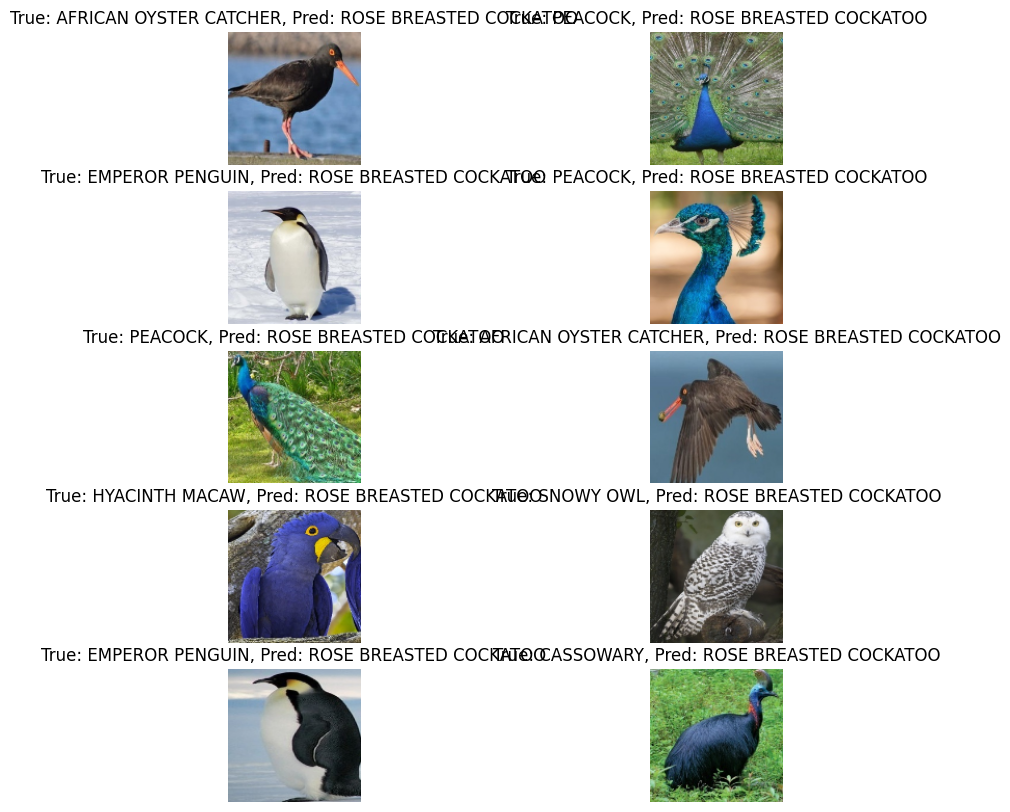

In [8]:
y_pred = model.predict(test_images_cnn_input)
y_pred_labels = np.argmax(y_pred, axis = 1)

incorrect_idx = np.where(y_pred_labels != np.argmax(test_labels_ohe, axis=1))[0]

if len(incorrect_idx) < n:
    sample_incorrect = incorrect_idx
else:
    sample_incorrect = np.random.choice(incorrect_idx, size=n, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_incorrect):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images_cnn_input[idx])
    plt.title(f"True: {decoded_labels_dictionary[np.argmax(test_labels_ohe[idx])]}, Pred: {decoded_labels_dictionary[y_pred_labels[idx]]}")
    plt.axis("off")
plt.show()

In [9]:
input_layer = Input(shape=(128, 128, 3))

x = Conv2D(64, (7, 7), padding="same", strides=2, activation="relu")(input_layer)

x1 = Conv2D(32, (1, 1), padding="same", activation="relu")(x)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)

x2 = Conv2D(32, (1, 1), padding="same", activation="relu")(x)
x2 = Conv2D(32, (5, 5), padding="same", activation="relu")(x2)

x3 = MaxPooling2D((1, 1), padding="same")(x)
x3 = Conv2D(32, (1, 1), padding="same", activation="relu")(x3)


x = concatenate([x, x1, x2, x3], axis=-1)

x = Flatten()(x)

x = Dense(256, activation = "relu")(x)

output_layer = Dense(10, activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()
plot_model(model, to_file="model_plot8.png", show_shapes=True)


model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])


start = time.time()
model.fit(train_images_cnn_input, train_labels_ohe, epochs = 10, batch_size = 32, validation_data=(validation_images_cnn_input, validation_labels_ohe))
end = time.time()
total_time = end-start

score = model.evaluate(test_images_cnn_input, test_labels_ohe)
print("Test accuracy: ", score[1])
print(f"Train Time(h): {total_time/(60*60)}")
print(f"Train Time(m): {total_time/60}")
print(f"Train Time(s): {total_time}")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 64, 64, 64)     │          9,472 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 64, 64, 32)     │          2,080 │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 64, 64, 32)     │          2,080 │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 64, 64, 64)     │              0 │ conv2d_11[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 64, 64, 32)     │          9,248 │ conv2d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 64, 64, 32)     │         25,632 │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 64, 64, 32)     │          2,080 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 64, 64, 160)    │              0 │ conv2d_11[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_13[0][0],       │
│                           │                        │                │ conv2d_15[0][0],       │
│                           │                        │                │ conv2d_16[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 655360)         │              0 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 256)            │    167,772,416 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 10)             │          2,570 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 167,825,578 (640.20 MB)

 Trainable params: 167,825,578 (640.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 242s 5s/step - accuracy: 0.1738 - loss: 9.0523 - val_accuracy: 0.5400 - val_loss: 1.4413
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 259s 5s/step - accuracy: 0.6077 - loss: 1.2004 - val_accuracy: 0.7400 - val_loss: 0.7728
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 235s 5s/step - accuracy: 0.7758 - loss: 0.7379 - val_accuracy: 0.8400 - val_loss: 0.4633
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 258s 5s/step - accuracy: 0.9142 - loss: 0.2962 - val_accuracy: 0.8800 - val_loss: 0.3224
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 269s 5s/step - accuracy: 0.9787 - loss: 0.0822 - val_accuracy: 0.8800 - val_loss: 0.4315
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 230s 4s/step - accuracy: 0.9937 - loss: 0.0337 - val_accuracy: 0.9200 - val_loss: 0.3299
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 231s 5s/step - accuracy: 0.9914 - loss: 0.0414 - val_accuracy: 0.9200 - val_loss: 0.2989
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 233s 5s/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.9200 - v

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step


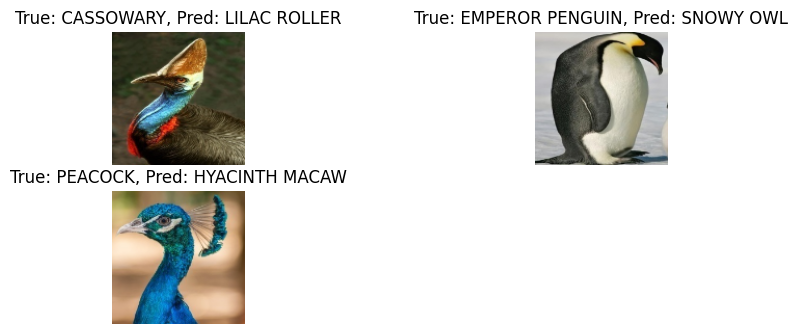

In [10]:
y_pred = model.predict(test_images_cnn_input)
y_pred_labels = np.argmax(y_pred, axis = 1)

incorrect_idx = np.where(y_pred_labels != np.argmax(test_labels_ohe, axis=1))[0]

if len(incorrect_idx) < n:
    sample_incorrect = incorrect_idx
else:
    sample_incorrect = np.random.choice(incorrect_idx, size=n, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_incorrect):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images_cnn_input[idx])
    plt.title(f"True: {decoded_labels_dictionary[np.argmax(test_labels_ohe[idx])]}, Pred: {decoded_labels_dictionary[y_pred_labels[idx]]}")
    plt.axis("off")
plt.show()